In [ ]:
from plotnine import *
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np

# Classification Data

The classification dataset we will be looking at is a breast cancer dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer(as_frame=1)
bc_df = bc_data.frame
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Our targets for this dataset are "malignant" and "benign", represented in the dataset under "target" as 0 and 1 respectively.

The goal is to train a model that uses the data from the dataset to determine whether a tumor or mass is malignant or benign.

In [ ]:
X = bc_data.data
y = bc_data.target
print(bc_data.target_names)

['malignant' 'benign']


Scatter matrix: wayyy too much data to really make use

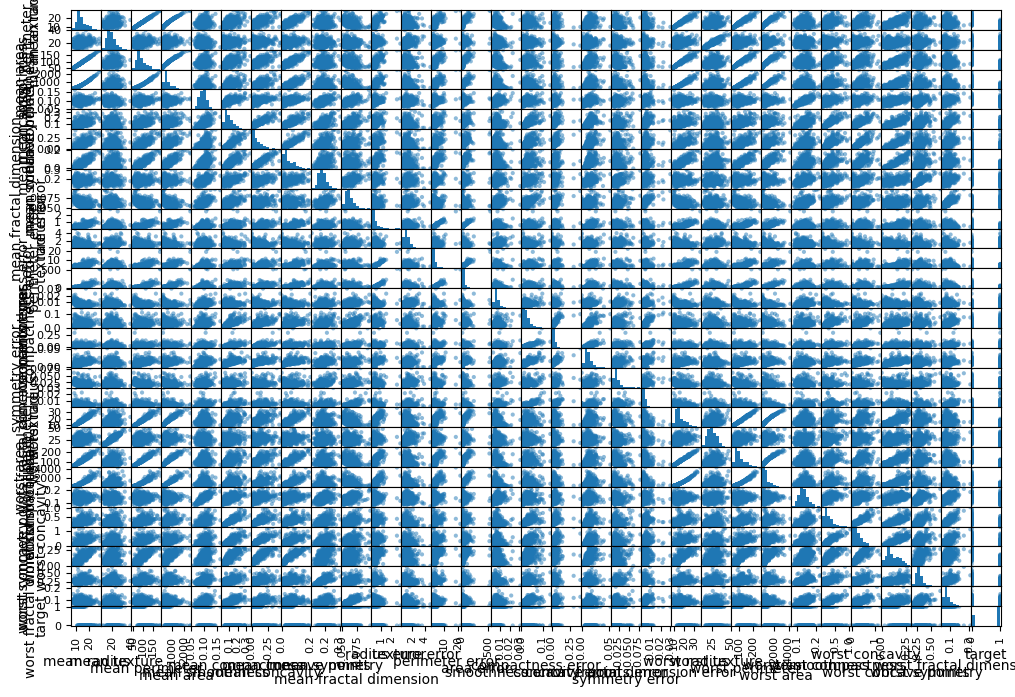

In [ ]:
scatter_matrix(bc_df, figsize=(12,8))
plt.show()

Feature selection using SelectKBest

Select the number of features, or just skip this altogether and use all features in the dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

                        # !!! select number of features !!!
skb = SelectKBest(f_classif, k=)
X = skb.fit_transform(X, y)

# This loop uses the boolean support mask of the skb to re-apply the column names 
# of our features to make life easier
bool_mask = skb.get_support()
new_features = []

for b, feature in zip(bool_mask, bc_data.feature_names):
    if b:
        new_features.append(feature)

df = pd.DataFrame(X, columns=new_features)
df

# Model

Choose a model from the scikit-learn machine learning library.

See the Sklearn User Guide for the available models, and some examples for usage.

API: https://scikit-learn.org/stable/modules/classes.html

Below are some common imports of various model types. Use the API to determine usage for these model types

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Logistic Regression (Classification Model)
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
from sklearn.svm import SVC

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Decision Trees 
from sklearn.tree import DecisionTreeClassifier

# Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

Split the data into training and testing. Test size changes the partition size.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Define model here and train with .fit()
model =  # choose model
model.fit(X_train, y_train)

Cross Validation for classification - this cell may take some time to run depending on the model you chose:

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)

# Try different types of scoring here too: https://scikit-learn.org/stable/modules/model_evaluation.html
acc = cross_val_score(model, X, y, cv=rskf);
recall = cross_val_score(model, X, y, cv = rskf, scoring = 'recall');
precision = cross_val_score(model, X, y, cv = rskf, scoring = 'precision');
loss = cross_val_score(model, X, y, cv = rskf, scoring = 'neg_log_loss');

metrics = []
metrics.append(acc)
metrics.append(recall)
metrics.append(precision)
metrics.append(loss)
metrics = pd.DataFrame(metrics).T
metrics.columns = ['accuracy', 'recall','precision','loss']

color = {"whiskers": "black", "medians": "black", "caps": "black"}
metrics.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Cross Validation Results")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbaedb1f-e080-44ef-8c4c-e26e8e2ffbfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>